<a href="https://colab.research.google.com/github/Isaacp445/Credit-card-fraud-in-python/blob/main/credit_card_fraud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('credit_card_fraud_dataset.csv')
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
# insight to the data types I'll be working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [ ]:
#Lets take a look at the TransactionType column
df['TransactionType'].value_counts()

,count
TransactionType,
refund,50131
purchase,49869


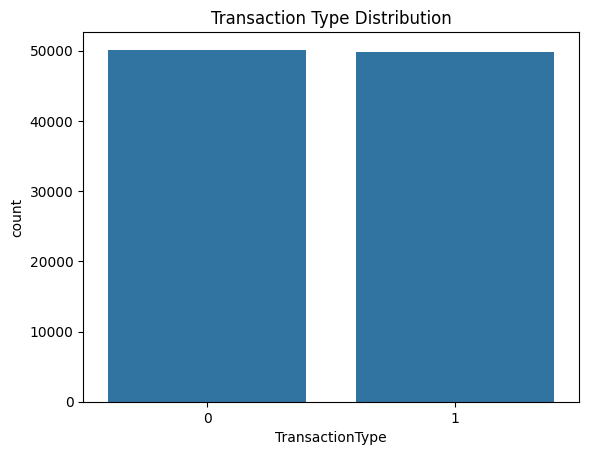

In [ ]:
#lets visualize this and see how close the margin is between refunds and purchases
sns.countplot(x='TransactionType', data=df)
plt.title('Transaction Type Distribution')
plt.show()
# Nearly identical

In [ ]:
# which location earns the most on average
df.groupby('Location')['Amount'].mean().sort_values(ascending=False)

,Amount
Location,
Houston,2510.600224
Phoenix,2509.400378
San Jose,2505.569568
Chicago,2497.522896
Philadelphia,2496.504547
Los Angeles,2493.017409
Dallas,2492.671768
New York,2491.948727
San Diego,2489.408425


In [ ]:
# which location has the most interaction
df.groupby('Location')['TransactionType'].count().sort_values(ascending=False)

,TransactionType
Location,
Chicago,10193
San Diego,10111
Dallas,10076
San Antonio,10062
New York,9993
Houston,9991
Phoenix,9960
Los Angeles,9936
Philadelphia,9873


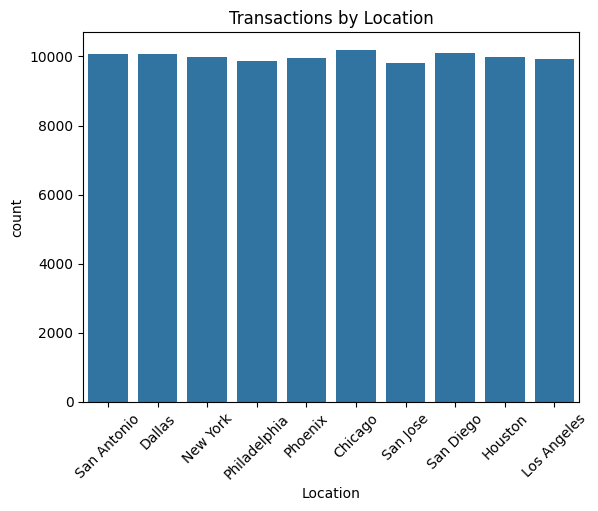

In [ ]:
# Lets visualize it
sns.countplot(x='Location', data=df)
plt.xticks(rotation=45)
plt.title('Transactions by Location')
plt.show()
# Chicago looks to have slightly more than the rest but overall each location has a similar distribution when it comes to transactions in all

In [ ]:
#when it comes to the TransactionType and Location
#which location has the most Transactions classified as refunds
df[df['TransactionType'] == 'Refund']['Location'].value_counts()

,count
Location,


In [ ]:
# There seems to be a problem with this solution because of the data types being objects(string) we can't get an answer for this question
# Lets modify the column TransactionType by chaing it to 1s and 0s
# 1 indicates a purchase and 0 indicates a refund

df['TransactionType'] = df['TransactionType'].replace({'purchase' : 1, 'refund' : 0})

In [ ]:
df.head()


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,0,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,0,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,1,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,1,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,1,Phoenix,0


In [ ]:
# Now that I have modified the column lets see which location has the most transactions with refunds
df[df['TransactionType'] == 0 ]['Location'].value_counts()
# Chicago tops our list with San Diego and Los Angeles coming in close second and third

,count
Location,
Chicago,5167
San Diego,5096
Los Angeles,5058
Phoenix,5031
Dallas,5010
New York,5009
San Antonio,5005
Houston,4996
San Jose,4897


In [ ]:
# What about the location with the most transactions with purchases
df[df['TransactionType'] == 1 ]['Location'].value_counts()
# Very close between the top 3 locations

,count
Location,
Dallas,5066
San Antonio,5057
Chicago,5026
San Diego,5015
Philadelphia,5011
Houston,4995
New York,4984
Phoenix,4929
San Jose,4908


In [ ]:
# on average how much fraud is commited
df.groupby('IsFraud')['Amount'].mean()
# Very close between the two

,Amount
IsFraud,
0,2496.88992
1,2517.16444


In [ ]:
# Lets take a look at the rows that is classified as fraud
# Fraud in the data set is classified as 1
df[df['IsFraud'] == 1]

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
190,191,2024-09-07 18:24:35.463748,1703.80,916,1,San Jose,1
191,192,2024-04-27 01:48:35.463751,4248.10,862,1,San Jose,1
208,209,2023-11-05 01:05:35.463826,1641.32,826,1,San Jose,1
319,320,2024-06-16 18:30:35.464289,281.18,237,1,Philadelphia,1
370,371,2023-10-29 04:09:35.464522,3047.66,789,1,New York,1
...,...,...,...,...,...,...,...
99392,99393,2024-06-05 00:58:36.024971,3358.10,286,1,Chicago,1
99607,99608,2023-10-27 08:34:36.026018,564.19,454,1,Phoenix,1
99614,99615,2023-11-21 04:18:36.026049,4083.63,514,1,Philadelphia,1
99725,99726,2024-08-30 04:40:36.026481,3825.68,15,0,Los Angeles,1


In [ ]:
# With over a thousand rows with fraud being commited lets gain a bit more insight
# What is the highest amount where fraud was being commited
df[df['IsFraud'] == 1]['Amount'].max()
# I too would be worried if I lost that much to fraud

4985.88

In [ ]:
# What about fraud being commited with the least amount
df[df['IsFraud'] == 0]['Amount'].min()
# I see this as the equivalent of batman stopping you for jaywalking

1.05

In [ ]:
# Which location has the most fraud going on
df[df['IsFraud'] == 1]['Location'].value_counts()

,count
Location,
New York,116
San Diego,115
Houston,105
San Antonio,99
Dallas,99
Phoenix,99
Chicago,95
Los Angeles,95
Philadelphia,90


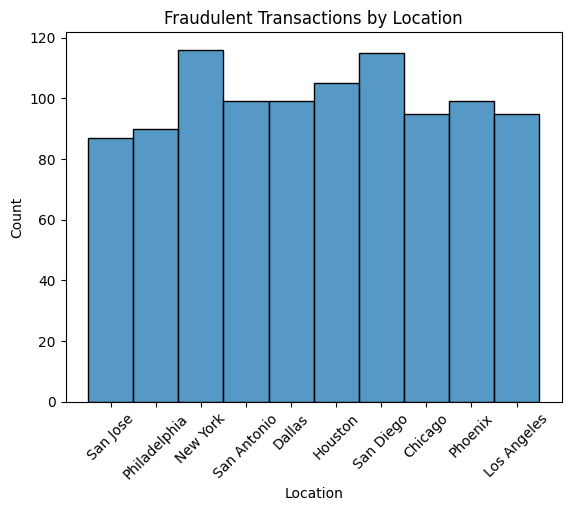

In [ ]:
# Lets visualize this with a histogram
sns.histplot(df[df['IsFraud'] == 1]['Location'])
plt.xticks(rotation=45)
plt.title('Fraudulent Transactions by Location')
plt.show()

In [ ]:
# If new york is the place with the highest risk of credit card fraud
# how safe is it to be in San jose
df[df['Location'] == 'San Jose']['IsFraud'].value_counts()
# Thats quite the margin

,count
IsFraud,
0,9718
1,87


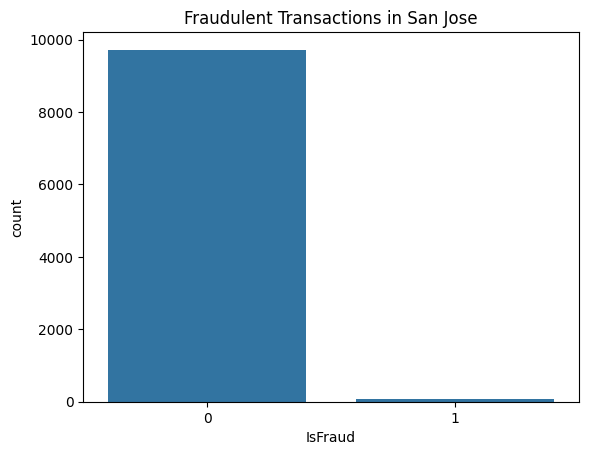

In [ ]:
# Lets visualize this
sns.countplot(x='IsFraud', data=df[df['Location'] == 'San Jose'])
plt.title('Fraudulent Transactions in San Jose')
plt.show()
